In [1]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import time

import copy
plt.ion()

from loess import Loess
import pickle
import cv2

from tqdm import tqdm 

In [14]:

def find_miss(y,app,pca):
        y = np.array(y)
        x = [i for i in range(y.shape[0])]
        x = np.array(x)
        
        #split data into trianing and test or missing data
        fx,vx,fy,vy = train_test_split(x,y,test_size=0.2, random_state=4)#try shuffle on off
        
        fx, fy = zip(*sorted(zip(fx, fy)))
        vx, vy = zip(*sorted(zip(vx, vy)))
        
        fx = np.array(fx)
        vx = np.array(vx)
        fy = np.array(fy)
        vy = np.array(vy)
           
        nfy = pca.transform(fy)
        
        pred_y = np.zeros((vy.shape[0],nfy.shape[1]))
        
        for i in range(nfy.shape[1]):
            loess = Loess(fx, nfy[:,i])
            for j,gx in enumerate(vx):
                pred_y[j,i] = loess.estimate(gx, window=5)
        
        pred_imgs =  pca.inverse_transform(pred_y)
        pred_imgs = pred_imgs.reshape((pred_imgs.shape[0],200,200))
        vy = vy.reshape((vy.shape[0],200,200))
        
        for i in range(pred_imgs.shape[0]):
#             all_pred.append(pred_imgs[i])
            f, axarr = plt.subplots(1,2)
            axarr[0].imshow(pred_imgs[i])
            axarr[1].imshow(vy[i])
    #             plt.imshow(pred_y[i])
            plt.show()
        print("^"*10)

In [15]:
#find gait nm-05 nm-06
with open("indices_preprocessed.txt", "rb") as fl:
    ind = pickle.load(fl)
    
#gait energy --helper function
def find_gait(path,app):
    y = []
    num_gait=0
    
    for nm in range(1,5):
        pth = path+"/nm-0"+str(nm)+"/"
        files = glob.glob(pth+"*.png")
        files.sort()
        print("nm-",nm)
        for j in range(len(ind[int(app)][nm-1])-2):
            if j is None:
                continue
            c=0
            #all images in gait cycle
            for i in range(ind[int(app)][nm-1][j],ind[int(app)][nm-1][j+2]+1):
                img = cv2.imread(files[i],0)
#                 print(img.shape)
                y.append(list(np.concatenate(img).flat))
    y = np.array(y)
    print(y.shape)
    
    pca = PCA(n_components = .99)
    pca.fit(y)
    nw_y = pca.transform(y)
    print(nw_y.shape)
    
    for nm in range(5,7):
        pth = path+"/nm-0"+str(nm)+"/"
        files = glob.glob(pth+"*.png")
        files.sort()
        print("nm-",nm)
        for j in range(len(ind[int(app)][nm-1])-2):
            if j is None:
                continue
            c=0
            #all images in gait cycle
            imgs = []
            for i in range(ind[int(app)][nm-1][j],ind[int(app)][nm-1][j+2]+1):
                img = cv2.imread(files[i],0)
                imgs.append(list(np.concatenate(img).flat))
            find_miss(imgs,app,pca)
    print('-'*10)


  0%|          | 0/1 [00:00<?, ?it/s]

person 001
nm- 1
nm- 2
nm- 3
nm- 4
(166, 40000)
(166, 111)
nm- 5


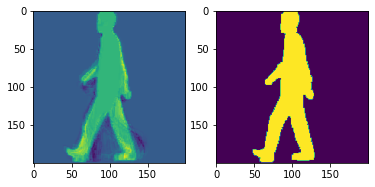

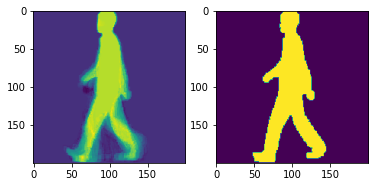

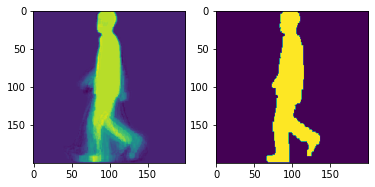

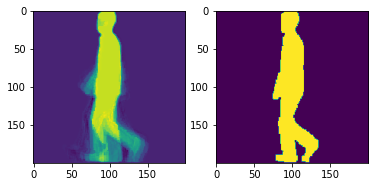

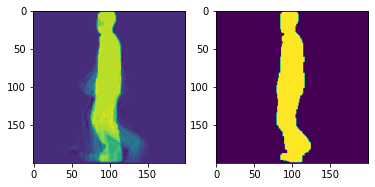

^^^^^^^^^^
nm- 6


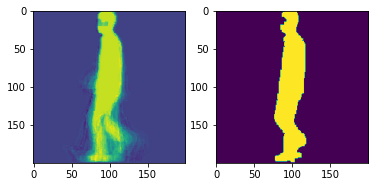

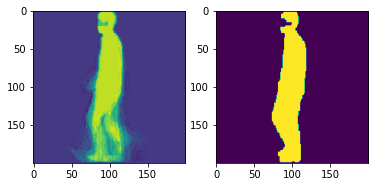

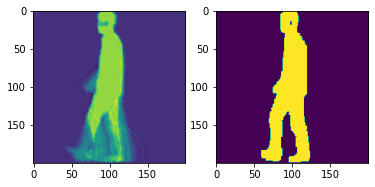

^^^^^^^^^^


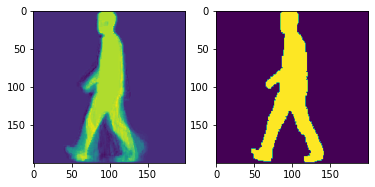

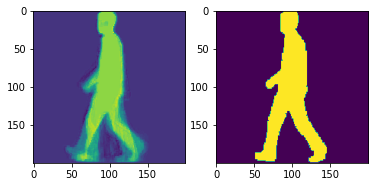

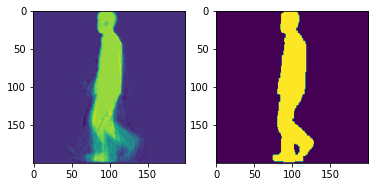

^^^^^^^^^^


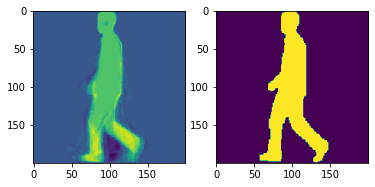

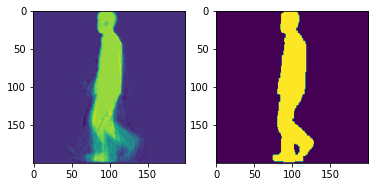

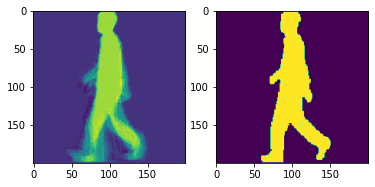

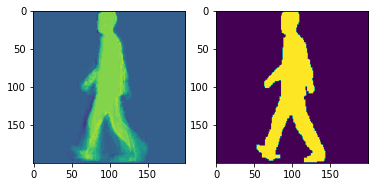

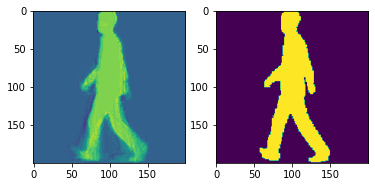

100%|██████████| 1/1 [00:05<00:00,  5.66s/it]

^^^^^^^^^^
----------
********************


In [16]:
#gait energy images
for i in tqdm(range(1,2)):
    if i<10:
        app = "00"+str(i)
    elif i<100:
        app = "0"+str(i)
    else :
        app = str(i)
    path = "/SSD/Pratik/Gait_Data/Casia_data_preprocessed/GaitDatasetB-silh_PerfectlyAlingedFullPossibleCyclesImages/"+app
    print(f"person {app}")
    find_gait(path,app)
    print("*"*20)